<a href="https://colab.research.google.com/github/mfaysoares/GOT-Analysis/blob/main/GOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Game of Thrones: Uma Análise Descritiva**


---


Em Maio, completou 2 anos desde o término de Game of Thrones, seriado esse que conquistou milhares de fãs ao redor do mundo, incluindo a mim. Sendo um verdadeiro cinéfilo e um entusiasta de dados, procurei nesse projeto fazer uma análise descritiva de alguns dos principais datasets disponibilizados sobre a série. Sendo assim, como diria Ned Stark: 

> *Winter is coming! – Ned Stark* 🐺

#### **Observações:**

*   Essa análise teve grande inspiração no projeto [Analyzing The Lord of the Rings data](https://https://www.kaggle.com/code/xvivancos/analyzing-the-lord-of-the-rings-data), com alguns conceitos e análises similares;
*   Os datasets foram retirados da plataforma Kaggle e estão disponíveis nos seguintes links: [Game of Thrones Dataset](https://https://www.kaggle.com/datasets/mylesoneill/game-of-thrones) e [Game of Thrones Script All Seasons
](https://https://www.kaggle.com/datasets/albenft/game-of-thrones-script-all-seasons)



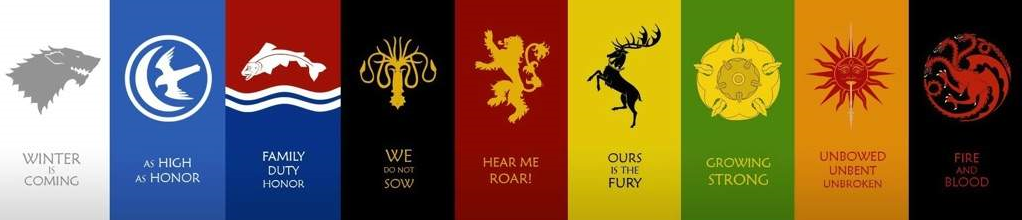

### **1. Bibliotecas utilizadas:**
Abaixo segue alguns pacotes Python utilizados no projeto:

*   **Pandas**: Manipulação e análise de dados;
*   **Numpy**: Operações matemáticas;
*   **Matplotlib e Seaborn**: Criação de gráficos;
*   **WordCloud**: Criação de nuvens de palavras.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

### **2. Leitura e visualização dos *dataframes*:**

Nesse projeto foram utilizados duas bases de dados de fontes distintas:


1.   **GOT_Scripts.csv**: Scripts de todas as temporadas;
2.   **character-deaths.csv**: Fornece a relação de personagem com o ano de sua morte;
3.   **battles.csv**: Relação das batalhas da série com informações de vitória, alianças, etc.

Para realizar a leitura das bases, utilizei o comando *read_csv()* da biblioteca pandas. Nessa função, o argumento é o nome/caminho da base. Já para visualizar uma parte do conteúdo, tilizei o comando *head()*, onde o argumento representa o número de n linhas que se deseja visualizar. 




In [2]:
# GOT SCRIPTS
df_scripts = pd.read_csv('GOT_Scripts.csv')
df_scripts.head(3)

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?


In [3]:
# CHARACTER DEATHS
df_characters = pd.read_csv('character-deaths.csv')
df_characters.head(3)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1


In [4]:
# BATTLES
df_battles = pd.read_csv('battles.csv')
df_battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


### **3. Análise dos dados:**

---

**3.1 Batalhas:**

No meu ponto de vista de espectador, acredito que a casa Lannister tenho sido aquela com mais batalhas travadas no papel de invasor. Mas será que meu palpite está certo? Para validar essa informação,  utilizei o dataframe **df_battles**.

Inicialmente, procurei analisar a coluna *attacker_1*.

In [5]:
batalhas = pd.DataFrame()
batalhas['Invasor'] = df_battles['attacker_1'].value_counts()
batalhas['Invasor'] = batalhas['Invasor'].fillna(0)
batalhas['Invasor']

Lannister                      8
Stark                          8
Greyjoy                        7
Baratheon                      6
Bolton                         2
Frey                           2
Darry                          1
Brotherhood without Banners    1
Free folk                      1
Brave Companions               1
Bracken                        1
Name: Invasor, dtype: int64

Agora, analisando o número de vezes que cada casa teve papel de defensora, realizando a mesma análise só que para a coluna *defender_1*:



In [6]:
batalhas['Defensor'] = df_battles['defender_1'].value_counts()
batalhas['Defensor'] = batalhas['Defensor'].fillna(0)
batalhas['Defensor'] = batalhas['Defensor'].astype(int)
batalhas['Defensor']

Lannister                      9
Stark                          8
Greyjoy                        3
Baratheon                      4
Bolton                         1
Frey                           0
Darry                          1
Brotherhood without Banners    0
Free folk                      0
Brave Companions               2
Bracken                        0
Name: Defensor, dtype: int64

Agora por fim, o número total de batalhas que cada casa realizou, somando as duas colunas do novo *dataframe* e visualizar essa informações graficamente:


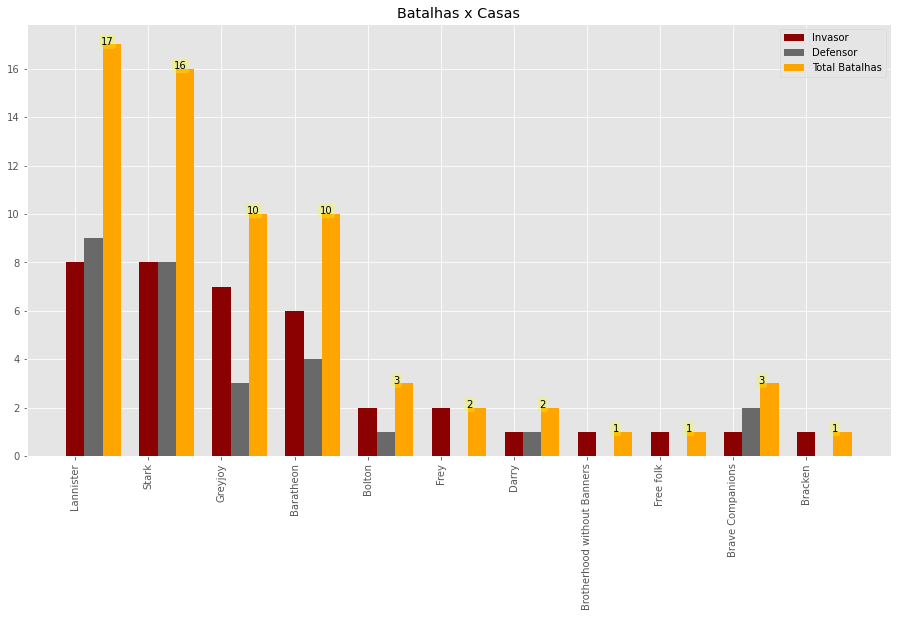

In [8]:
batalhas['Total de Batalhas'] = batalhas['Invasor'] + batalhas['Defensor']

fig = plt.figure(figsize=(12, 6))
x = np.arange(len(batalhas))
ax = fig.add_axes([0,0,1,1])
ax.bar(x + 0.00, batalhas['Invasor'], color = 'darkred', width = 0.25)
ax.bar(x + 0.25, batalhas['Defensor'], color = 'dimgray', width = 0.25)
ax.bar(x + 0.50, batalhas['Total de Batalhas'], color = 'orange', width = 0.25)

plt.xticks(range(0,len(batalhas.index)), batalhas.index, rotation=90)
ax.legend(labels=['Invasor', 'Defensor', 'Total Batalhas'])
ax.grid(True)
ax.set_title('Batalhas x Casas')
plt.style.use('ggplot')

for i,j in zip(x + 0.35, batalhas['Total de Batalhas']):
    ax.annotate(str(j),
                xy=(i,j),
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
                )

Concluindo a análise acima, percebi que meu palpite estaca correto! ✅ Realmente os Lannisters foram a casa com maior número de batalhas travadas ao longo da série. Contudo, para minha surpresa, eles ficaram no páreo com a casa Stark, empatando ainda no número de vezes que foram invasores.


---



**3.2 Reis:**

Analisando ainda o dataframe de batalhas, é possível chegar em uma relação de quem seria o maior rei baseado no seu número de vitórias? Para responder essa pergunta, fiz a seguinte análise:



In [9]:
kings = df_battles.copy()
kings['Vitorias'] = np.where(kings['attacker_outcome'] == 'win', 1, 0)
kings['Derrotas'] = np.where(kings['attacker_outcome'] == 'loss', 1, 0)
kings_outcome = kings.groupby('attacker_king').agg({'Vitorias':'sum', 'Derrotas':'sum'})
kings_outcome['Reis'] = kings_outcome.index
kings_outcome['Resultado'] = kings_outcome['Vitorias'] - kings_outcome['Derrotas']
kings_outcome = kings_outcome.reset_index(drop = True)
kings_outcome = kings_outcome[['Reis', 'Vitorias', 'Derrotas', 'Resultado']]
kings_outcome

,Reis,Vitorias,Derrotas,Resultado
0,Balon/Euron Greyjoy,7,0,7
1,Joffrey/Tommen Baratheon,13,1,12
2,Robb Stark,8,2,6
3,Stannis Baratheon,2,2,0


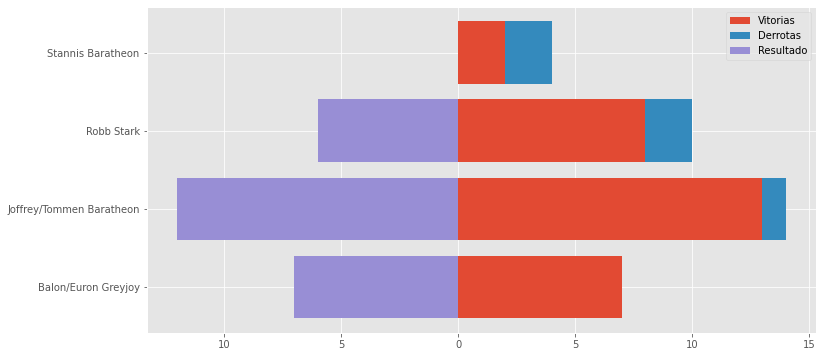

In [20]:
from matplotlib.ticker import FuncFormatter

def positive(x, pos):
    if x < 0:
      return '%d' % (-1*x)
    if x >= 0:
      return '%d' % x

fig2, ax = plt.subplots(figsize=(12, 6))
ax.barh(kings_outcome['Reis'], kings_outcome['Vitorias'], left = 0)
ax.barh(kings_outcome['Reis'], kings_outcome['Derrotas'], left = kings_outcome['Vitorias'])
ax.barh(kings_outcome['Reis'], - kings_outcome['Resultado'], left = 0)
ax.legend(labels=['Vitorias', 'Derrotas', 'Resultado'])
formatter = FuncFormatter(positive)
ax.xaxis.set_major_formatter(formatter)




---
**3.3. Quantos generais os exércitos de diferentes reis tinham?**

Esse problema foi solucionado por DELIWALA em [2]. Contudo, achei interessante essa análise e tentei implementá-la de uma forma mais simples, analisando o número de generais (comandantes) com a função *nunique*.


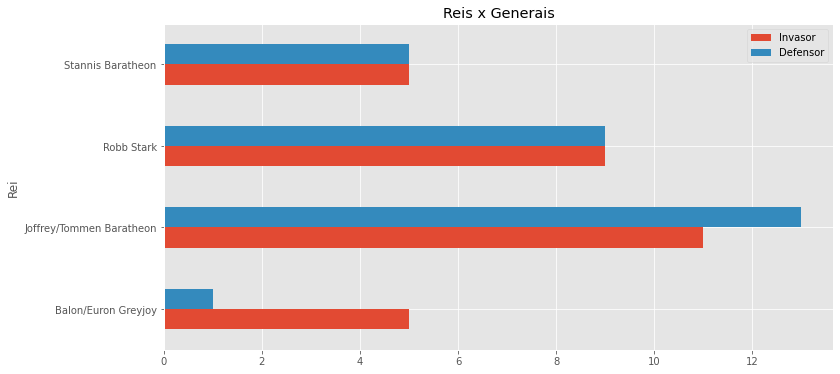

In [ ]:
commanders = df_battles.groupby(['attacker_king']).agg({'attacker_commander':'nunique',
                                                        'defender_commander':'nunique'})
commanders['Reis'] = commanders.index

ax = commanders.plot.barh(figsize=(12,6),
                          title = 'Reis x Generais'
                          )
ax.set_ylabel("Rei")
ax.legend(['Invasor', 'Defensor'])


---
**3.4. Quais as regiões com o maior número de batalhas?**

Ainda utilizando o datafram **battles.csv**, pode-se relacionar as batalhas por região, utilizando a coluna '*region*'.

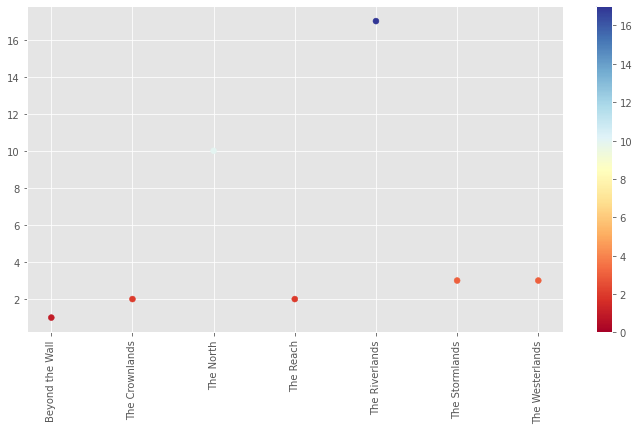

In [ ]:
regiao = df_battles.groupby(['region']).agg({'battle_number':'count'})
regiao['Regiao'] = regiao.index

plt.figure(figsize=(12, 6))
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(regiao['Regiao'], regiao['battle_number'], c=regiao['battle_number'], 
                 vmin=0, vmax=max(regiao['battle_number']), s=35, cmap=cm)
plt.xticks(rotation=90)
plt.colorbar(sc)

plt.show()

---
**3.5. Relação de mortes por livro:**

O impacto das mortes tanto na série quanto nos livros sempre foi um diferencial que impactou os fãs da obra. Seja pelas diversas mortes de personagens até então considerados protagonistas, quanto pela forma delas. Utilizando o dataframe *df_characters*, analisei a relação da quantidade de mortes em cada livro.

> Os personagens cujo livro da morte/falecimento não é informado (valores como *Nan*) foram retirados da análise.
Como a base não está atualizada, consideramos **somente os primeiros 5 livros** da série.





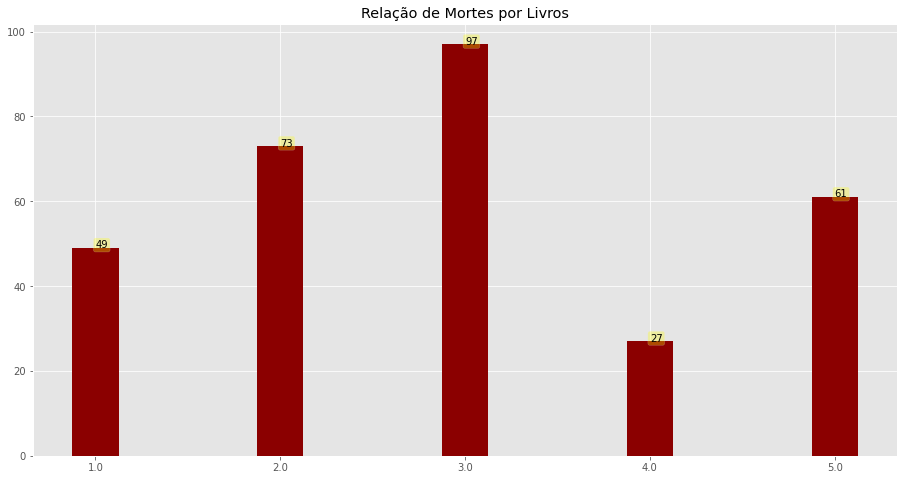

In [ ]:
deaths = df_characters.groupby('Book of Death').agg({'Name':'count'})
deaths['Book'] = deaths.index

fig = plt.figure(figsize=(12, 6))
x = np.arange(len(deaths))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, deaths['Name'], color = 'darkred', width = 0.25)

plt.xticks(range(0,len(deaths.index)), deaths.index)
ax.grid(True)
ax.set_title('Relação de Mortes por Livros')
plt.style.use('ggplot')

for i,j in zip(x, deaths['Name']):
    ax.annotate(str(j),
                xy=(i,j),
                bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
                )

Verifiquei então que dentre os 5 primeiros livros da série *A Song of Ice and Fire*, o livro com o maior número de mortes foi o 3º livro, **A Tormenta de Espadas (*A Storm of Swords*)**.

### **4. Text Mining:**

---

**4.1 Nuvem de palavras:**

A série tem algumas frases memoráveis como *The Winter is Coming!, Dracarys, Valar Morghulis*. Pensando nisso, qual seria a palavra que foi mais mencionada ao longo dela? Nessa primeira análise dos scripts da série, construí uma nuvem de palavras para verificar quais aquelas mencionadas com maior frequência.

Para realizar esse projeto, utilizei a biblioteca wordcloud.

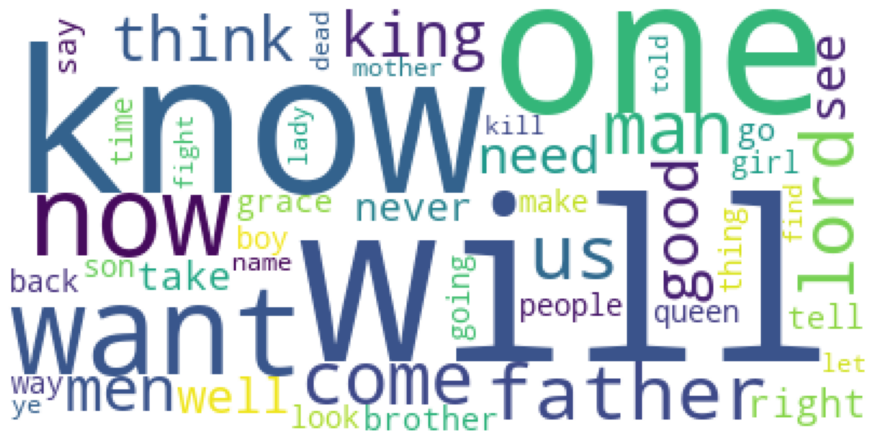

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df_scripts['Sentence']:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
                      
plt.figure(figsize = (12, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

---

**4.2. Protagonista:**

Apesar da série fornecer alguns personagens principais, nunca ficou oficialmente estipulado sobre quem seria o protagonista. Personagens como John Snow, Daenerys Targaryen, Tyrion e Cersei Lannister, tiveram esse papel muito mais pelo apelo dos seus fãs do que algum dado propriamente dito. Visto essa dúvida, procurei analisar qual seria o protagonista com base nos scripts da série.

> Existem muitos critérios para determinar essa variável; entretanto, nesse estudo determinarei o protagonista com base naquele com o maior número de falas.



Text(0.5, 1.0, 'Personagens com Maior N° de Falas')

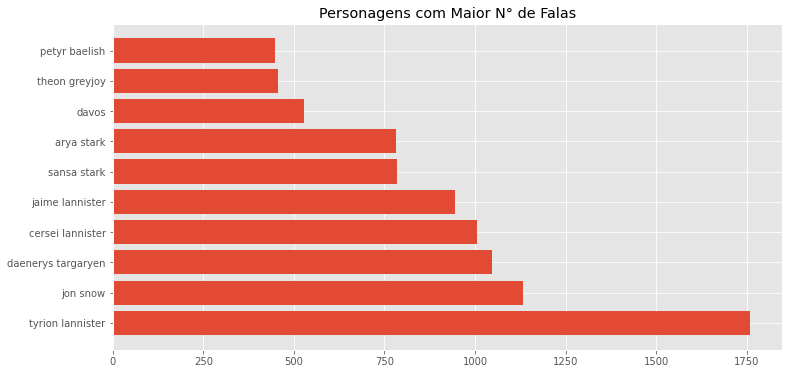

In [ ]:
protagonistas = df_scripts.groupby('Name').agg({'Sentence':'count'})
protagonistas['Name'] = protagonistas.index
protagonistas = protagonistas.sort_values(['Sentence'], ascending = False)
protagonistas = protagonistas.head(10)

fig4 = plt.figure(figsize=(12, 6))
plt.barh(protagonistas['Name'], protagonistas['Sentence'])
plt.title('Personagens com Maior N° de Falas')

Utilizando o critério anteriormente dito, podemos então concluir que o protagonista da série Game of Thrones é...

**Tyrion Lannister!**

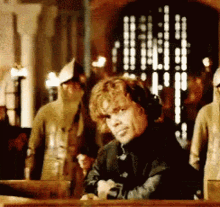

### **5. Referências:**

---


*   https://www.kaggle.com/code/michau96/harry-potter-and-the-text-mining
*   https://www.kaggle.com/code/shaildeliwala/exploratory-analysis-and-predictions/notebook
*   https://www.kaggle.com/code/xvivancos/analyzing-the-lord-of-the-rings-data
*   https://https//www.kaggle.com/datasets/albenft/game-of-thrones-script-all-seasons
*   https://https//www.kaggle.com/datasets/mylesoneill/game-of-thrones





**Se você chegou até aqui, obrigado!** 😊

**Se você tiver qualquer dúvida ou sugestão para melhorar a análise, fico à disposição.**

*Valar Morghulis!* 🧟
